# Exploratory Data Analysis

In [1]:
import os
import pandas as pd

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

df = pd.read_csv('pets.csv')

import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df.shape

(8, 4)

In [3]:
df

,name,animal,size,friendly
0,Bo,snake,small,True
1,Miles,dog,small,True
2,Fifi,cat,small,False
3,Muffy,cat,small,True
4,Rufus,dog,large,True
5,Jebediah,snail,small,True
6,Aloysius,dog,large,False
7,Tom,cat,large,False


In [10]:
names_df = pd.get_dummies(df.name)
animals_df = pd.get_dummies(df.animal)
size_df = pd.get_dummies(df['size'])

In [12]:
df = df.join(names_df)
df = df.join(animals_df)
df = df.join(size_df)

In [17]:
df.columns

Index([u'name', u'animal', u'size', u'friendly', u'Aloysius', u'Bo', u'Fifi',
       u'Jebediah', u'Miles', u'Muffy', u'Rufus', u'Tom', u'cat', u'dog',
       u'snail', u'snake', u'large', u'small'],
      dtype='object')

In [27]:

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree


X = pd.concat([names_df, animals_df, size_df], axis = 1)

X = pd.concat([animals_df, size_df], axis = 1)

model = tree.DecisionTreeClassifier().fit(X, df.friendly)


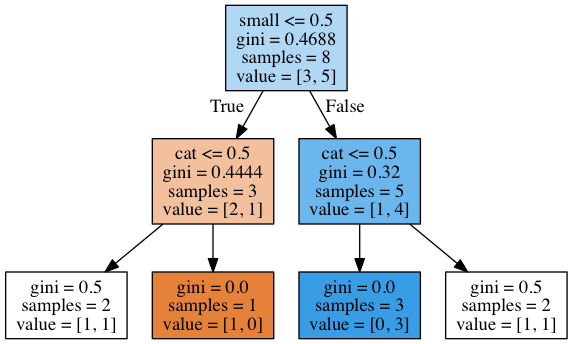

In [28]:
from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(model, filled=True, out_file='tree.dot',feature_names=X.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

In [45]:
df['up_to_4_letter_name']= df.name.str.len()<=4
df['name_begins_with_A']= df.name.str.startswith('A')

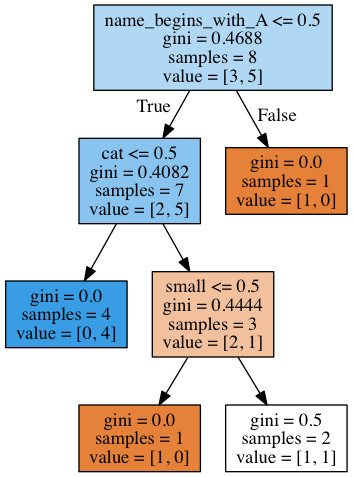

In [54]:
X = pd.concat([names_df, animals_df, size_df], axis = 1)

X = pd.concat([animals_df, size_df], axis = 1)

X = pd.concat([ animals_df,size_df, df['name_begins_with_A']], axis = 1)

model = tree.DecisionTreeClassifier().fit(X, df.friendly)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(model, filled=True, out_file='tree.dot',feature_names=X.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

# Logistic Regression being added here

In [63]:
c=(df.friendly*1)
X = pd.concat([names_df, animals_df, size_df,df['up_to_4_letter_name'],df['name_begins_with_A']], axis = 1)

In [64]:
X_train = X.drop('Tom',1)
X_train = X_train.drop('dog',1)
X_train = X_train.drop('small',1)

In [65]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

Collect the data

Tidy the data

Test and Train split

EDA

    You cant ask the machine to understand the data before you do
    Plots/significance testing/summary statistics

Modeling

    Feature engineering (selection)
    ML Algo selection


    

In [48]:
#subsetting the dataset on marketing channel as a dataframe
df[['MARKETINGCHANNELGROUP']]

,MARKETINGCHANNELGROUP
0,SEO
1,SEO
2,SEO
3,SEO
4,SEO
5,SEO
6,SEO
7,SEO
8,SEO
9,SEO


In [49]:
#Replacing the values in the dataframe for cases where the marketing channel is unknown
df['MARKETINGCHANNELGROUP'].replace('Unknown', 'Direct',inplace=True)

In [50]:
df[['MARKETINGCHANNELGROUP']]

,MARKETINGCHANNELGROUP
0,SEO
1,SEO
2,SEO
3,SEO
4,SEO
5,SEO
6,SEO
7,SEO
8,SEO
9,SEO


In [51]:
df.columns

Index([u'DTE', u'MARKETINGCHANNELGROUP', u'USER_ID', u'FIRST_PRCHS_DATE',
       u'GENRE_CAT_FINAL', u'ARTISTCATEGORY', u'TICKETSSOLDFP', u'GMSFP',
       u'GCFS', u'M12TICKETSSOLD', u'M12GMS'],
      dtype='object')

In [52]:
df['MARKETINGCHANNELGROUP'].value_counts()

Direct                    60480
Paid Search               41445
SEO                       25995
stubhub.com                 150
Contextual                   91
Email                        79
Push Notifications           51
Social                       31
Affiliates                   27
LGAFL - TDC - Checkout       14
Stubhub.com                  11
MLBAM                         9
Digital Marketing             2
eBay                          1
Name: MARKETINGCHANNELGROUP, dtype: int64

In [53]:
#Limiting the dataset to direct, paid search and SEO
df2 = df[df['MARKETINGCHANNELGROUP'].isin(['Direct','Paid Search','SEO'])]

In [54]:
df2.MARKETINGCHANNELGROUP

0                 SEO
1                 SEO
2                 SEO
3                 SEO
4                 SEO
5                 SEO
6                 SEO
7                 SEO
8                 SEO
9                 SEO
             ...     
128376    Paid Search
128377         Direct
128378    Paid Search
128379         Direct
128380         Direct
128381    Paid Search
128382    Paid Search
128383    Paid Search
128384         Direct
128385         Direct
Name: MARKETINGCHANNELGROUP, Length: 127920, dtype: object

In [55]:
df2.shape

(127920, 11)

In [57]:
df2.MARKETINGCHANNELGROUP.value_counts()

Direct         60480
Paid Search    41445
SEO            25995
Name: MARKETINGCHANNELGROUP, dtype: int64

In [178]:
#In the SQL, I did a left join, hence, to remove the buyers who did not buy in 
#the 12month period, I removed
df2.fillna(0)

,DTE,MARKETINGCHANNELGROUP,USER_ID,FIRST_PRCHS_DATE,GENRE_CAT_FINAL,...,3.100-200,4.200-600,5.600-1000,6.>1000,RepeatPurchase
0,0,SEO,15561030,2016-07-09 00:00:00,Theater,...,0,1,0,0,0
1,0,SEO,33086170,2016-02-12 00:00:00,Theater,...,0,0,0,1,0
2,0,SEO,80288418,2016-02-21 00:00:00,Theater,...,0,0,1,0,1
3,0,SEO,84239376,2016-04-03 00:00:00,Theater,...,0,1,0,0,1
4,0,SEO,85569001,2016-01-13 00:00:00,Theater,...,0,0,0,0,0
5,0,SEO,85626578,2016-01-17 00:00:00,Theater,...,1,0,0,0,0
6,0,SEO,85813283,2016-01-30 00:00:00,Theater,...,1,0,0,0,0
7,0,SEO,85816143,2016-01-30 00:00:00,Theater,...,0,0,0,1,0
8,0,SEO,85903145,2016-05-20 00:00:00,Theater,...,0,1,0,0,0
9,0,SEO,85940441,2016-02-07 00:00:00,Theater,...,0,1,0,0,0


In [58]:
#Classification problem adding another column that contains the class of the buyer
df['MultipleGCFRepeatBuyer'] =  (((df.M12TICKETSSOLD >0)*1 + (df.GCFS >0)*1)>1)*1
df['TheaterRepeatBuyer'] =  (((df.M12TICKETSSOLD >0)*1 + (df.MultipleGCFRepeatBuyer<1)*1)>1)*1
df['One&Done'] =(df.M12TICKETSSOLD==0)*1

In [59]:
df.columns

Index([u'DTE', u'MARKETINGCHANNELGROUP', u'USER_ID', u'FIRST_PRCHS_DATE',
       u'GENRE_CAT_FINAL', u'ARTISTCATEGORY', u'TICKETSSOLDFP', u'GMSFP',
       u'GCFS', u'M12TICKETSSOLD', u'M12GMS', u'MultipleGCFRepeatBuyer',
       u'TheaterRepeatBuyer', u'One&Done'],
      dtype='object')

In [179]:
#Checking if the same categorization is showing up twice
((df['MultipleGCFRepeatBuyer'] +df['TheaterRepeatBuyer'] +df['One&Done'])==1).sum()

127920

In [180]:
#Adding another category here
def func(row):
    if row['MultipleGCFRepeatBuyer'] == 1:
        return 'MultipleGCFRepeatBuyer'
    elif row['TheaterRepeatBuyer'] == 1:
        return 'TheaterRepeatBuyer' 
    else:
        return 'One&Done'

df['Segment'] = df.apply(func, axis=1)

/Users/issingh/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [181]:
df.Segment.value_counts()

One&Done                  112234
MultipleGCFRepeatBuyer     10096
TheaterRepeatBuyer          5590
Name: Segment, dtype: int64

In [34]:
df.columns

Index([u'DTE', u'MARKETINGCHANNELGROUP', u'USER_ID', u'FIRST_PRCHS_DATE',
       u'GENRE_CAT_FINAL', u'ARTISTCATEGORY', u'TICKETSSOLDFP', u'GMSFP',
       u'GCFS', u'M12TICKETSSOLD', u'M12GMS', u'MultipleGCFRepeatBuyer',
       u'TheaterRepeatBuyer', u'One&Done', u'Segment'],
      dtype='object')

In [63]:
#Limiting the dataset to direct, paid search and SEO
df = df[df['MARKETINGCHANNELGROUP'].isin(['Direct','Paid Search','SEO'])]

In [64]:
#Adding the one hot encoding in this section
onehot1 = pd.get_dummies(df['MARKETINGCHANNELGROUP'])
onehot2 = pd.get_dummies(df['ARTISTCATEGORY'])

In [65]:
df2=df.join(onehot1)
df2=df2.join(onehot2)

In [70]:
df2.columns
df2['RepeatPurchase'] = (df2.M12TICKETSSOLD >0)*1

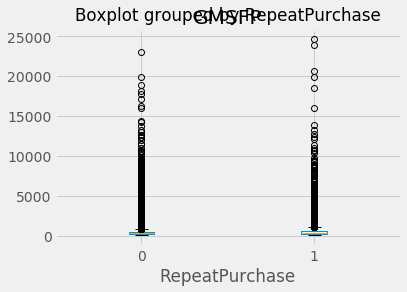

In [163]:
df.boxplot(column='GMSFP',by='RepeatPurchase')

In [175]:
df.RepeatPurchase.value_counts()

0    112234
1     15686
Name: RepeatPurchase, dtype: int64

In [176]:
df2.shape

(127403, 25)

In [140]:
df2 = df2[df2.GMSFP>0]
y_train = df2.RepeatPurchase
X_train = df2.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

In [141]:
X_train.columns

Index([u'DTE', u'GMSFP', u'Direct', u'Paid Search', u'SEO', u'1.TOP 50',
       u'2.50-100', u'3.100-200', u'4.200-600', u'5.600-1000', u'6.>1000'],
      dtype='object')

In [143]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;


In [144]:
#Now splitting the data and rerunning
#The parameter random state here is used to ensure that everytime we run the same split again, we end 
#with the exact same dataset

#Step 1
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.5, random_state=42)

#Step 2
logr = LogisticRegression()
logr.fit(X_train, y_train)

#Step 3
#Scoring the model on the training data 
score = logr.score(X_train,y_train)
print "The accuracy score for the training data set is {:.2f} percent".format(score*100)

pred_labels = logr.predict(X_test)


#Step 4
testing_score = accuracy_score(y_test, logr.predict(X_test))
print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The accuracy score for the training data set is 87.65 percent
The model accurately classified 87.84 percent of the testing data


In [145]:
#Pass the predictions and y_test into a confusion matrix
confusion_matrix(y_test, pred_labels)

array([[55950,     8],
       [ 7741,     3]])

In [146]:
#Calculate precision and recall scores
ps = float(precision_score(y_test, pred_labels))
rs = float(recall_score(y_test, pred_labels))

print ("The precision score is {:.2f} and the recall score is {:.2f}".format(ps*100, rs*100))

The precision score is 27.27 and the recall score is 0.04


In [147]:
#We have to calculate false positive score using our function

def FPR(YT, PR): 
    """
    YT is the target variable for the testing set
    PR is the predictions made on the features of the testing set
    """
    CM = confusion_matrix(YT, PR)
    TN = CM[0, 0]
    FP = CM[0, 1]
    FPR = FP/(float(FP+ TN))
    return FPR

In [148]:
FPR(y_test, pred_labels)

0.00014296436613174166

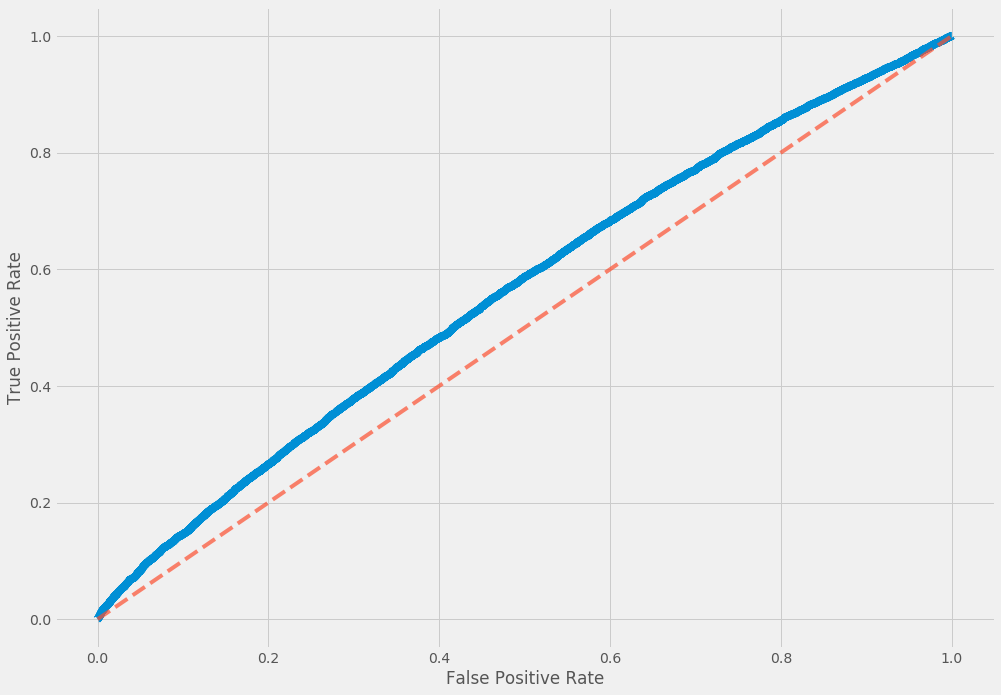

In [149]:
#Derive probabilities of class 1 from the test set
test_probs = logr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Will explain the fpr, tpr, thresholds
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()


In [150]:
#Caculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)

0.56062107503369563

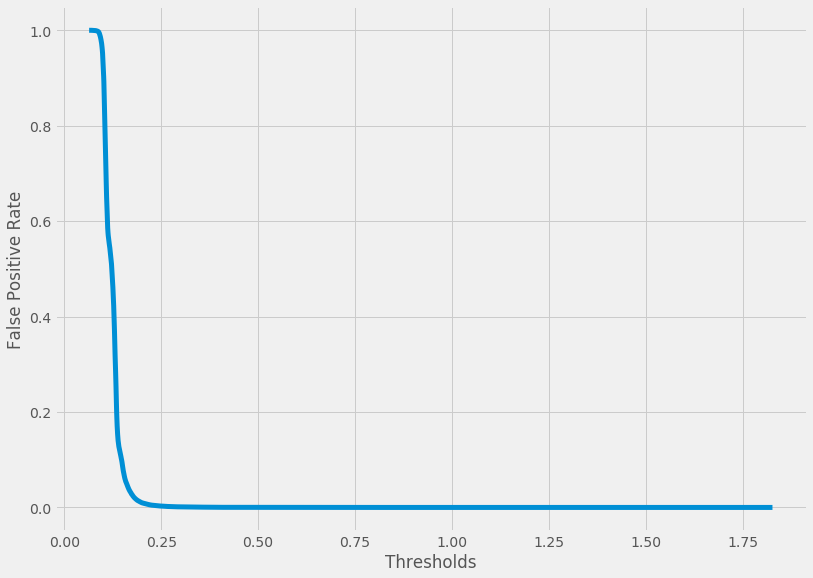

In [151]:
#Caculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate");

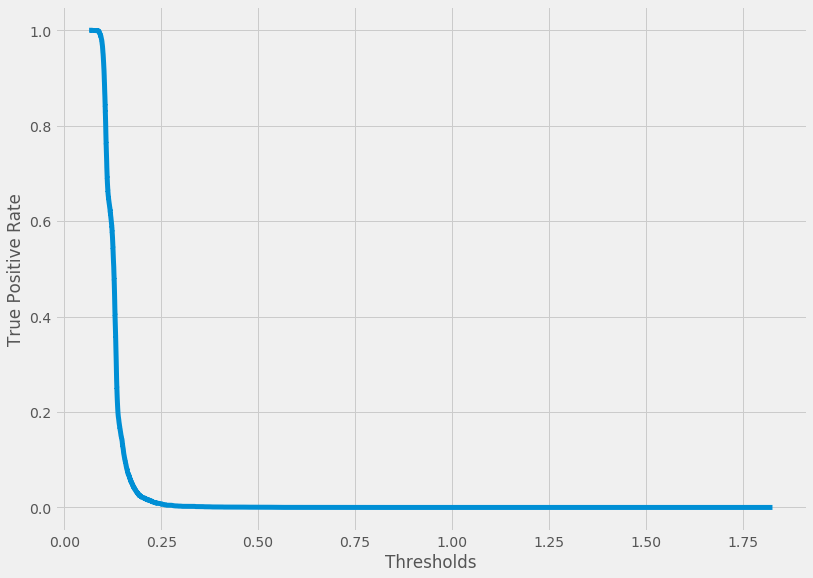

In [152]:
plt.figure(figsize=(12,9))
plt.plot(thres, tpr, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("True Positive Rate");

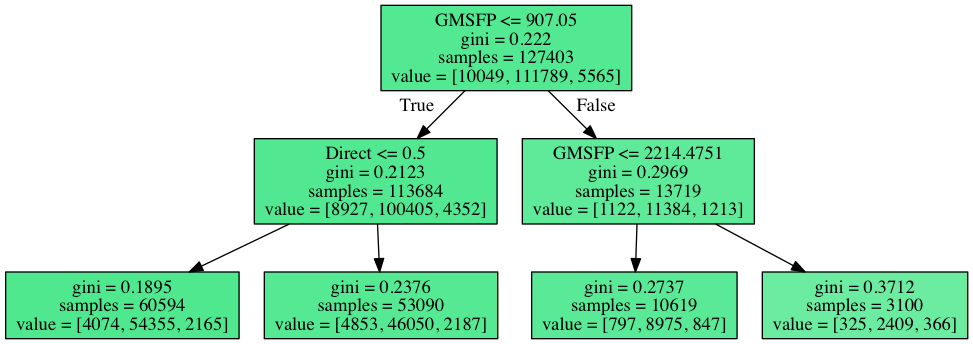

In [182]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df2 = df2[df2.GMSFP>0]
y_train = df2.Segment
X_train = df2.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

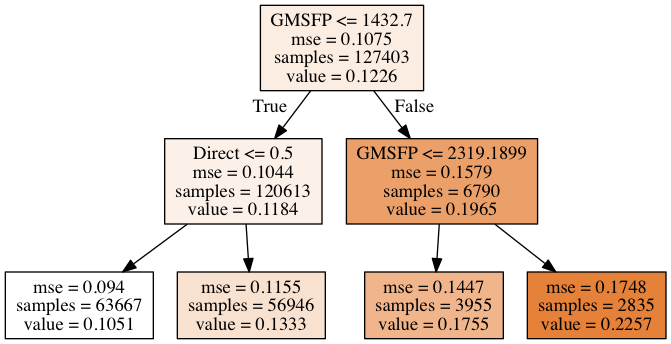

In [165]:
#Adding another version of decision tree just to see if removing DTE makes a difference


from sklearn import preprocessing
from sklearn import utils

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

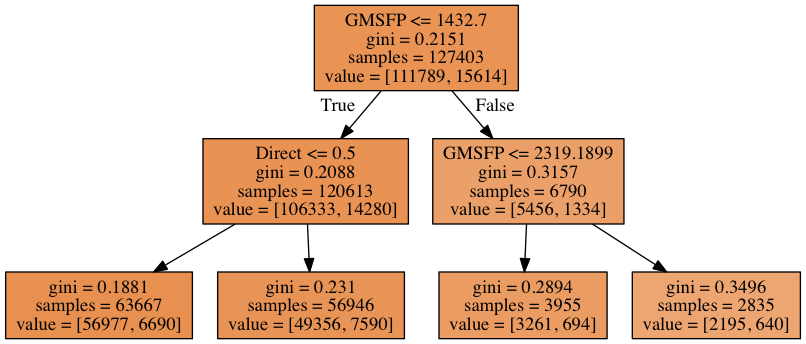

In [164]:

y_train = df2.RepeatPurchase
X_train = df2.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

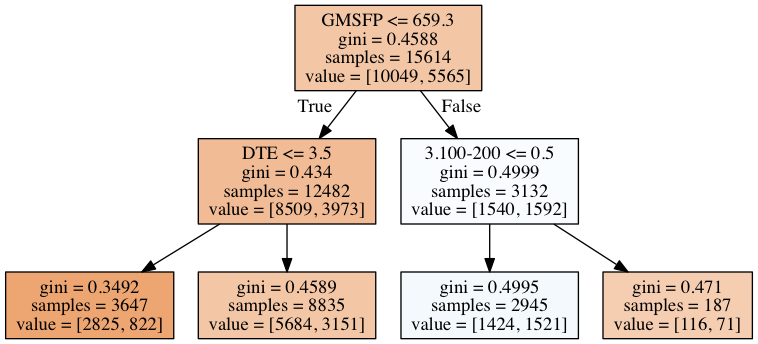

In [187]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df3 = df2[df2.GMSFP>0]
df3 = df3[df2.RepeatPurchase>0]
y_train = df3.Segment
X_train = df3.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

clf_gini = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

clf_gini.fit(X_train, y_train)


from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(clf_gini, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

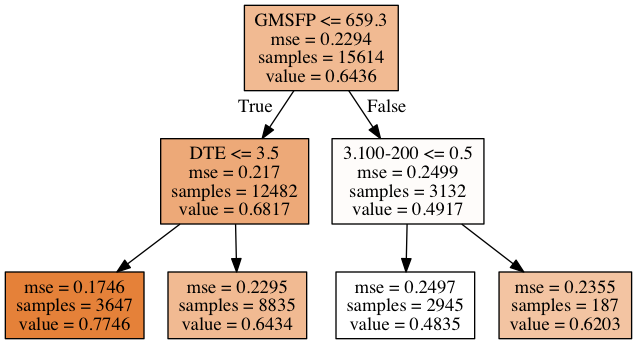

In [196]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df3 = df2[df2.GMSFP>0]
df3 = df3[df3.RepeatPurchase>0]
y_train = df3.MultipleGCFRepeatBuyer
X_train = df3.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)

import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')

In [198]:
#Building a decision tree classifier with a gini index
#Site referenced http://dataaspirant.com/2017/02/01/decision-tree-algorithm-python-with-scikit-learn/

df3 = df2[df2.GMSFP>0]
df3 = df3[df3.RepeatPurchase>0]

y_train = df3.MultipleGCFRepeatBuyer
X_train = df3.drop('RepeatPurchase',1)
X_train = X_train.drop('Segment',1)
X_train = X_train.drop('GCFS',1)
X_train = X_train.drop('MARKETINGCHANNELGROUP',1)
X_train = X_train.drop('USER_ID',1)
X_train = X_train.drop('FIRST_PRCHS_DATE',1)
X_train = X_train.drop('GENRE_CAT_FINAL',1)
X_train = X_train.drop('ARTISTCATEGORY',1)
X_train = X_train.drop('TICKETSSOLDFP',1)
X_train = X_train.drop('M12TICKETSSOLD',1)
X_train = X_train.drop('MultipleGCFRepeatBuyer',1)
X_train = X_train.drop('TheaterRepeatBuyer',1)
X_train = X_train.drop('One&Done',1)
X_train = X_train.drop('M12GMS',1)
X_train = X_train.drop('Direct',1)
X_train = X_train.drop('Paid Search',1)
X_train = X_train.drop('SEO',1)
X_train = X_train.drop('1.TOP 50',1)
X_train = X_train.drop('2.50-100',1)
X_train = X_train.drop('3.100-200',1)
X_train = X_train.drop('4.200-600',1)
X_train = X_train.drop('5.600-1000',1)
X_train = X_train.drop('6.>1000',1)

In [199]:
X_train.columns

Index([u'DTE', u'GMSFP'], dtype='object')

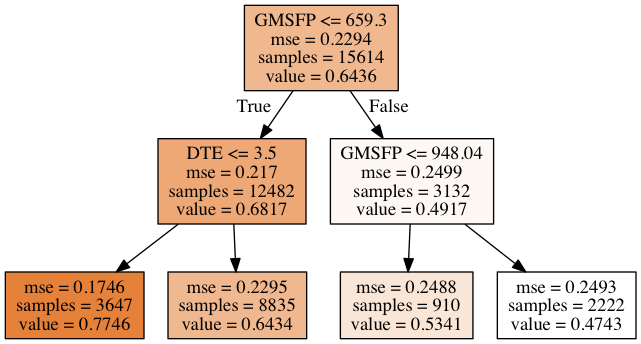

In [200]:



import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(X_train, y_train)

from sklearn import tree
import graphviz 

from sklearn.tree import export_graphviz

export_graphviz(regressor, filled=True, out_file='tree.dot',feature_names=X_train.columns)

!dot -Tpng tree.dot > tree.png # to convert the tree in a png image


from IPython.display import Image
Image(filename='tree.png')